In [1]:
from Simulator import Method, Simulator, ALL_GEARS

import matplotlib.pyplot as plt
import seaborn as sns

print(ALL_GEARS)

['OPENCL', 'CYTHON_THREADED', 'CYTHON_UNTHREADED', 'PYTHON']


In [2]:
avg_1 = dict(zip(ALL_GEARS,[0.5,4,4,10]))
std_1 = dict(zip(ALL_GEARS,[.1,1,1,1]))

avg_2 = dict(zip(ALL_GEARS,[2.5,4,4,10]))
std_2 = dict(zip(ALL_GEARS,[.5,1,1,1]))

avg_3 = dict(zip(ALL_GEARS,[7,7,7,7]))
std_3 = dict(zip(ALL_GEARS,[1,1,1,1]))

avg_anomaly = 7
std_anomaly = 2

bm = 10

max_iter = 450

#### Case study #0 : Normal w/ liquid

In [3]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
print("AFTER ONE BENCHMARK")
sim.print_methods()

print("AFTER SIMULATING")
sim.run_simulations_agent(iter_n=max_iter)
sim.print_methods()
sim.print_stats()

normal_liquid = sim

AFTER ONE BENCHMARK
['1', '2', '3'] 
OPENCL |0.9612| |0.6131| |0.2659| 
CYTHON_THREADED |0.0189| |0.1848| |0.2264| 
CYTHON_UNTHREADED |0.0173| |0.1693| |0.2403| 
PYTHON |0.0026| |0.0329| |0.2674| 

AFTER SIMULATING
['1', '2', '3'] 
OPENCL |0.9636| |0.5086| |0.2508| 
CYTHON_THREADED |0.0170| |0.2380| |0.2413| 
CYTHON_UNTHREADED |0.0171| |0.2181| |0.2608| 
PYTHON |0.0023| |0.0352| |0.2471| 

Ran the entire workflow a total of 450 times
The average time to run all methods was 11.13 std_dev 2.07
Method 1 used OPENCL the most (93.1%)
Method 2 used OPENCL the most (53.3%)
Method 3 used CYTHON_UNTHREADED the most (28.9%)


#### Case study #1 : Anomaly w/liquid

In [4]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
sim.print_methods()

sim.run_anomalous_simulations_agent(iter_n=max_iter, ano_start=50, ano_end=150, affected_gear=ALL_GEARS[0],
                                     new_avg=avg_anomaly, new_std=std_anomaly)
sim.print_methods()
sim.print_stats()

liquid_anomaly = sim

['1', '2', '3'] 
OPENCL |0.9599| |0.5814| |0.2351| 
CYTHON_THREADED |0.0177| |0.1659| |0.2532| 
CYTHON_UNTHREADED |0.0196| |0.2163| |0.2501| 
PYTHON |0.0028| |0.0364| |0.2616| 

['1', '2', '3'] 
OPENCL |0.7820| |0.0873| |0.0411| 
CYTHON_THREADED |0.1004| |0.3812| |0.3090| 
CYTHON_UNTHREADED |0.1007| |0.4671| |0.3196| 
PYTHON |0.0168| |0.0644| |0.3303| 

Ran the entire workflow a total of 450 times
The average time to run all methods was 14.63 std_dev 3.38
Method 1 used OPENCL the most (33.8%)
Method 2 used CYTHON_UNTHREADED the most (41.6%)
Method 3 used CYTHON_THREADED the most (34.0%)


#### Case study #3 : Permanent w/ liquid

In [5]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
sim.print_methods()

sim.run_anomalous_simulations_agent(iter_n=max_iter, ano_start=0, ano_end=max_iter+1, affected_gear=ALL_GEARS[0],
                                     new_avg=avg_anomaly, new_std=std_anomaly)
sim.print_methods()
sim.print_stats()

liquid_perm = sim

['1', '2', '3'] 
OPENCL |0.9581| |0.4848| |0.2776| 
CYTHON_THREADED |0.0216| |0.2340| |0.2408| 
CYTHON_UNTHREADED |0.0176| |0.2484| |0.2343| 
PYTHON |0.0027| |0.0328| |0.2473| 

['1', '2', '3'] 
OPENCL |0.1368| |0.1302| |0.2514| 
CYTHON_THREADED |0.3962| |0.3839| |0.2410| 
CYTHON_UNTHREADED |0.4046| |0.4204| |0.2456| 
PYTHON |0.0624| |0.0655| |0.2620| 

Ran the entire workflow a total of 450 times
The average time to run all methods was 16.71 std_dev 3.37
Method 1 used CYTHON_UNTHREADED the most (40.7%)
Method 2 used CYTHON_THREADED the most (41.6%)
Method 3 used CYTHON_UNTHREADED the most (26.9%)


#### Case study #4 : Normal w/o liquid

In [6]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
print("AFTER ONE BENCHMARK")
sim.print_methods()

print("AFTER SIMULATING")
sim.run_simulations(iter_n=max_iter, solid=True)
sim.print_methods()
sim.print_stats()

normal_solid = sim

AFTER ONE BENCHMARK
['1', '2', '3'] 
OPENCL |0.9740| |0.5782| |0.2792| 
CYTHON_THREADED |0.0123| |0.2084| |0.2435| 
CYTHON_UNTHREADED |0.0117| |0.1748| |0.2439| 
PYTHON |0.0020| |0.0386| |0.2334| 

AFTER SIMULATING
['1', '2', '3'] 
OPENCL |0.9714| |0.5774| |0.2793| 
CYTHON_THREADED |0.0135| |0.2088| |0.2434| 
CYTHON_UNTHREADED |0.0129| |0.1751| |0.2438| 
PYTHON |0.0022| |0.0387| |0.2334| 

Ran the entire workflow a total of 450 times
The average time to run all methods was 9.98 std_dev 1.11
Method 1 used OPENCL the most (100.0%)
Method 2 used OPENCL the most (100.0%)
Method 3 used OPENCL the most (100.0%)


#### Case study #5 : Anomaly w/o liquid

In [7]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
sim.print_methods()

sim.run_anomalous_simulations(iter_n=max_iter, ano_start=20, ano_end=100, affected_gear=ALL_GEARS[0], 
                              new_avg=avg_anomaly, new_std=std_anomaly, solid=True)
sim.print_methods()
sim.print_stats()

solid_anomaly = sim

['1', '2', '3'] 
OPENCL |0.9657| |0.4995| |0.2358| 
CYTHON_THREADED |0.0161| |0.2343| |0.2771| 
CYTHON_UNTHREADED |0.0156| |0.2359| |0.2604| 
PYTHON |0.0025| |0.0303| |0.2267| 

['1', '2', '3'] 
OPENCL |0.9688| |0.5252| |0.2330| 
CYTHON_THREADED |0.0147| |0.2223| |0.2781| 
CYTHON_UNTHREADED |0.0143| |0.2238| |0.2614| 
PYTHON |0.0023| |0.0287| |0.2275| 

Ran the entire workflow a total of 450 times
The average time to run all methods was 12.01 std_dev 4.68
Method 1 used OPENCL the most (100.0%)
Method 2 used OPENCL the most (100.0%)
Method 3 used OPENCL the most (100.0%)


#### Case study #6: Permanent w/o liquid

In [8]:
met_1 = Method('1',avg_1,std_1, exp=True)
met_2 = Method('2',avg_2,std_2, exp=True)
met_3 = Method('3',avg_3,std_3, exp=True)

sim = Simulator(met_1,met_2,met_3)
sim.benchmark_all_methods(bm)
sim.print_methods()

sim.run_anomalous_simulations(iter_n=max_iter, ano_start=0, ano_end=301, affected_gear=ALL_GEARS[0],
                               new_avg=avg_anomaly, new_std=std_anomaly, solid=True)
sim.print_methods()
sim.print_stats()

solid_perm = sim

['1', '2', '3'] 
OPENCL |0.9682| |0.4813| |0.2539| 
CYTHON_THREADED |0.0157| |0.2238| |0.2382| 
CYTHON_UNTHREADED |0.0137| |0.2576| |0.2317| 
PYTHON |0.0024| |0.0373| |0.2762| 

['1', '2', '3'] 
OPENCL |0.9725| |0.5098| |0.2595| 
CYTHON_THREADED |0.0136| |0.2115| |0.2364| 
CYTHON_UNTHREADED |0.0119| |0.2435| |0.2299| 
PYTHON |0.0020| |0.0353| |0.2742| 

Ran the entire workflow a total of 450 times
The average time to run all methods was 17.21 std_dev 5.96
Method 1 used OPENCL the most (100.0%)
Method 2 used OPENCL the most (100.0%)
Method 3 used OPENCL the most (100.0%)


In [9]:
import pandas as pd 

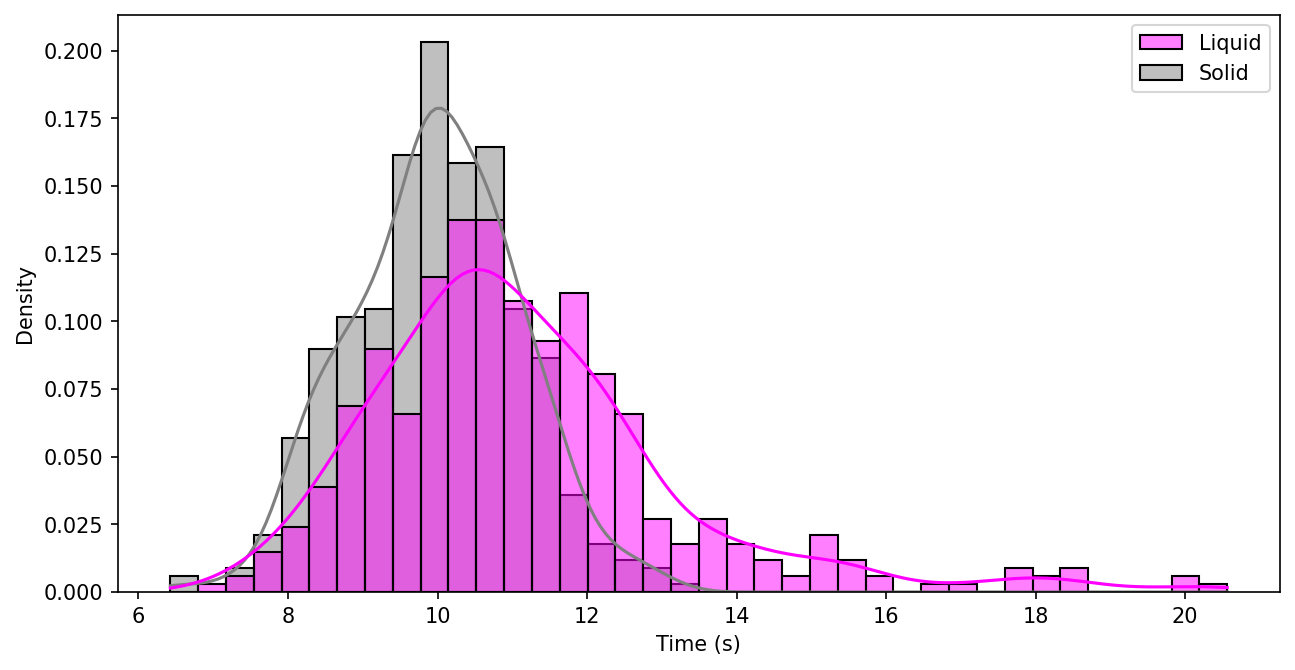

In [10]:
# Normal
df = pd.DataFrame({'Liquid':normal_liquid.total_time,'Solid':normal_solid.total_time})

plt.figure(figsize=(10,5), dpi=150)
sns.histplot(data=df, bins='auto', stat='density', kde=True, palette=['magenta','gray'])
plt.xlabel('Time (s)')
plt.show()

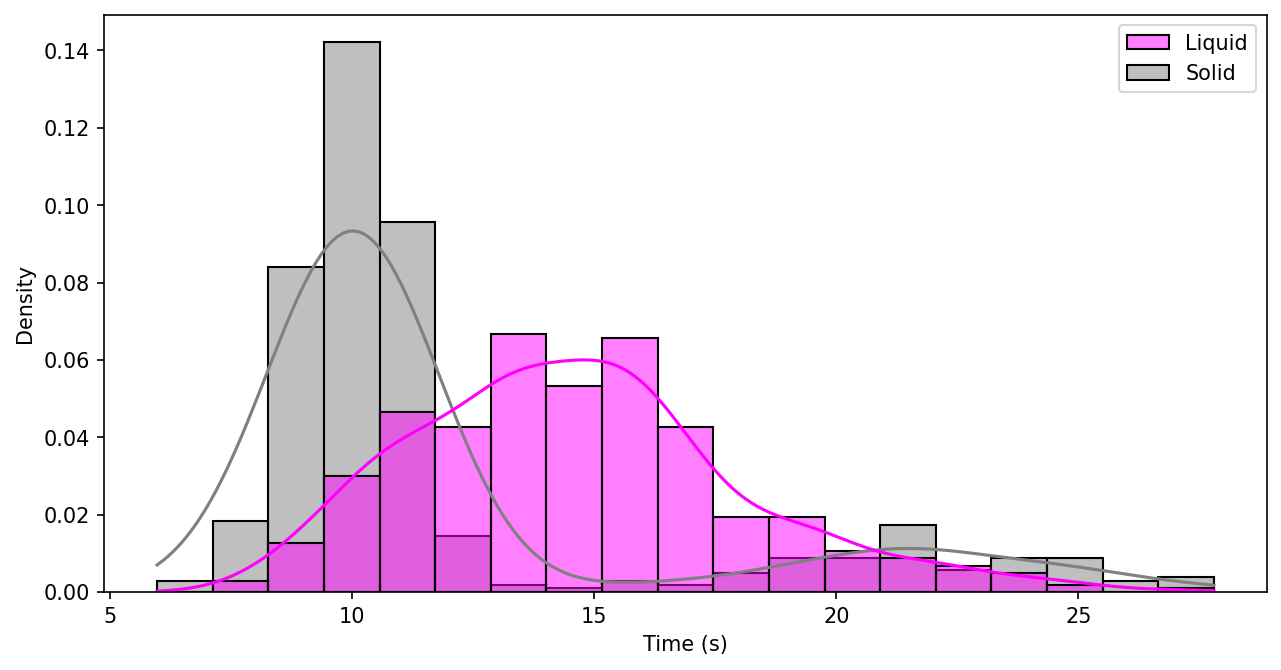

In [11]:
# Anomaly
df = pd.DataFrame({'Liquid':liquid_anomaly.total_time,'Solid':solid_anomaly.total_time})

plt.figure(figsize=(10,5), dpi=150)
sns.histplot(data=df, bins='auto', stat='density', kde=True, palette=['magenta','gray'])
plt.xlabel('Time (s)')
plt.show()

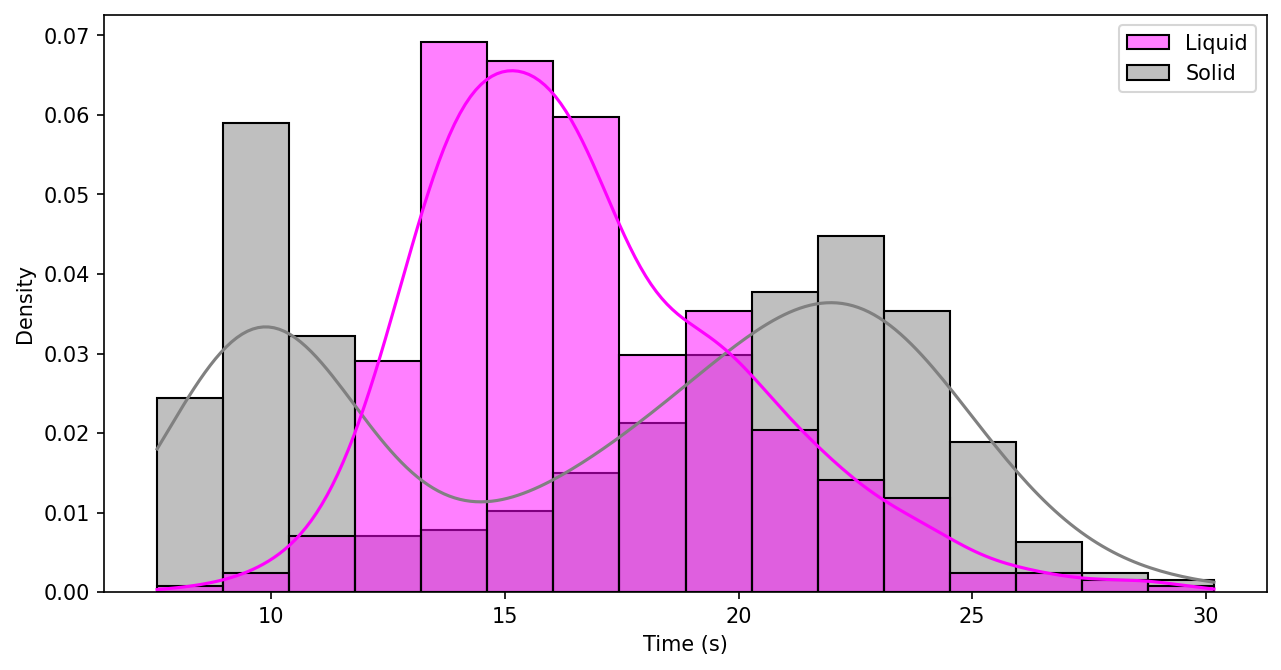

In [12]:
# Perm
df = pd.DataFrame({'Liquid':liquid_perm.total_time,'Solid':solid_perm.total_time})

plt.figure(figsize=(10,5), dpi=150)
sns.histplot(data=df, bins='auto', stat='density', kde=True, palette=['magenta','gray'])
plt.xlabel('Time (s)')
plt.show()

Text(0.5, 1.0, 'Normal Liquid')

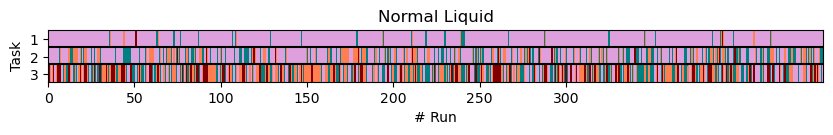

In [13]:
# Matrix where lines correspond to the workflow run and columns methods
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from skimage.transform import resize

matrix = np.zeros((max_iter,3))
for i in range(max_iter):
    for m in range(3):
        matrix[i,m] = ALL_GEARS.index(normal_liquid.gears[i][m])

matrix_resized = resize(matrix, (max_iter, 30), order=0, preserve_range=True, anti_aliasing=False)

cmap = ListedColormap(["plum", "teal", "coral","maroon"])

label_ticks = ['1','2','3']
value_ticks = [5,15,25]

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(matrix_resized.T, cmap=cmap)

ax.plot([0,max_iter], [9.5,9.5], color='black', linewidth=1.5)
ax.plot([0,max_iter], [19.5,19.5], color='black', linewidth=1.5)

ax.set_yticks(value_ticks, labels=label_ticks)
ax.set_xticks([0,50,100,150,200,250,300])

ax.set_xlim((0,max_iter-1))

ax.set_xlabel('# Run')
ax.set_ylabel("Task")

ax.set_title('Normal Liquid')


Text(0.5, 1.0, 'Transient Liquid')

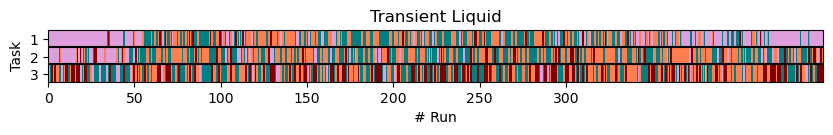

In [14]:
matrix = np.zeros((max_iter,3))
for i in range(max_iter):
    for m in range(3):
        matrix[i,m] = ALL_GEARS.index(liquid_anomaly.gears[i][m])

matrix_resized = resize(matrix, (max_iter, 30), order=0, preserve_range=True, anti_aliasing=False)

cmap = ListedColormap(["plum", "teal", "coral", "maroon"])

label_ticks = ['1','2','3']
value_ticks = [5,15,25]

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(matrix_resized.T, cmap=cmap)

ax.plot([0,max_iter], [9.5,9.5], color='black', linewidth=1.5)
ax.plot([0,max_iter], [19.5,19.5], color='black', linewidth=1.5)

ax.set_yticks(value_ticks, labels=label_ticks)
ax.set_xticks([0,50,100,150,200,250,300])

ax.set_xlim((0,max_iter-1))

ax.set_xlabel('# Run')
ax.set_ylabel("Task")

ax.set_title('Transient Liquid')


Text(0.5, 1.0, 'Permanent Liquid')

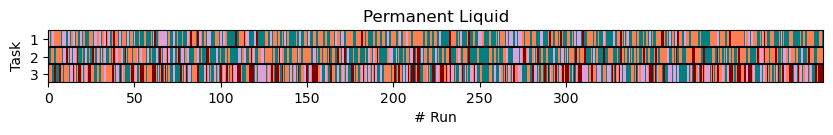

In [15]:
matrix = np.zeros((max_iter,3))
for i in range(max_iter):
    for m in range(3):
        matrix[i,m] = ALL_GEARS.index(liquid_perm.gears[i][m])

matrix_resized = resize(matrix, (max_iter, 30), order=0, preserve_range=True, anti_aliasing=False)

cmap = ListedColormap(["plum", "teal", "coral", "maroon"])

label_ticks = ['1','2','3']
value_ticks = [5,15,25]

fig, ax = plt.subplots(1,1,figsize=(10,10))
p = ax.imshow(matrix_resized.T, cmap=cmap)

ax.plot([0,max_iter], [9.5,9.5], color='black', linewidth=1.5)
ax.plot([0,max_iter], [19.5,19.5], color='black', linewidth=1.5)

ax.set_yticks(value_ticks, labels=label_ticks)
ax.set_xticks([0,50,100,150,200,250,300])

ax.set_xlim((0,max_iter-1))

ax.set_xlabel('# Run')
ax.set_ylabel("Task")

ax.set_title('Permanent Liquid')

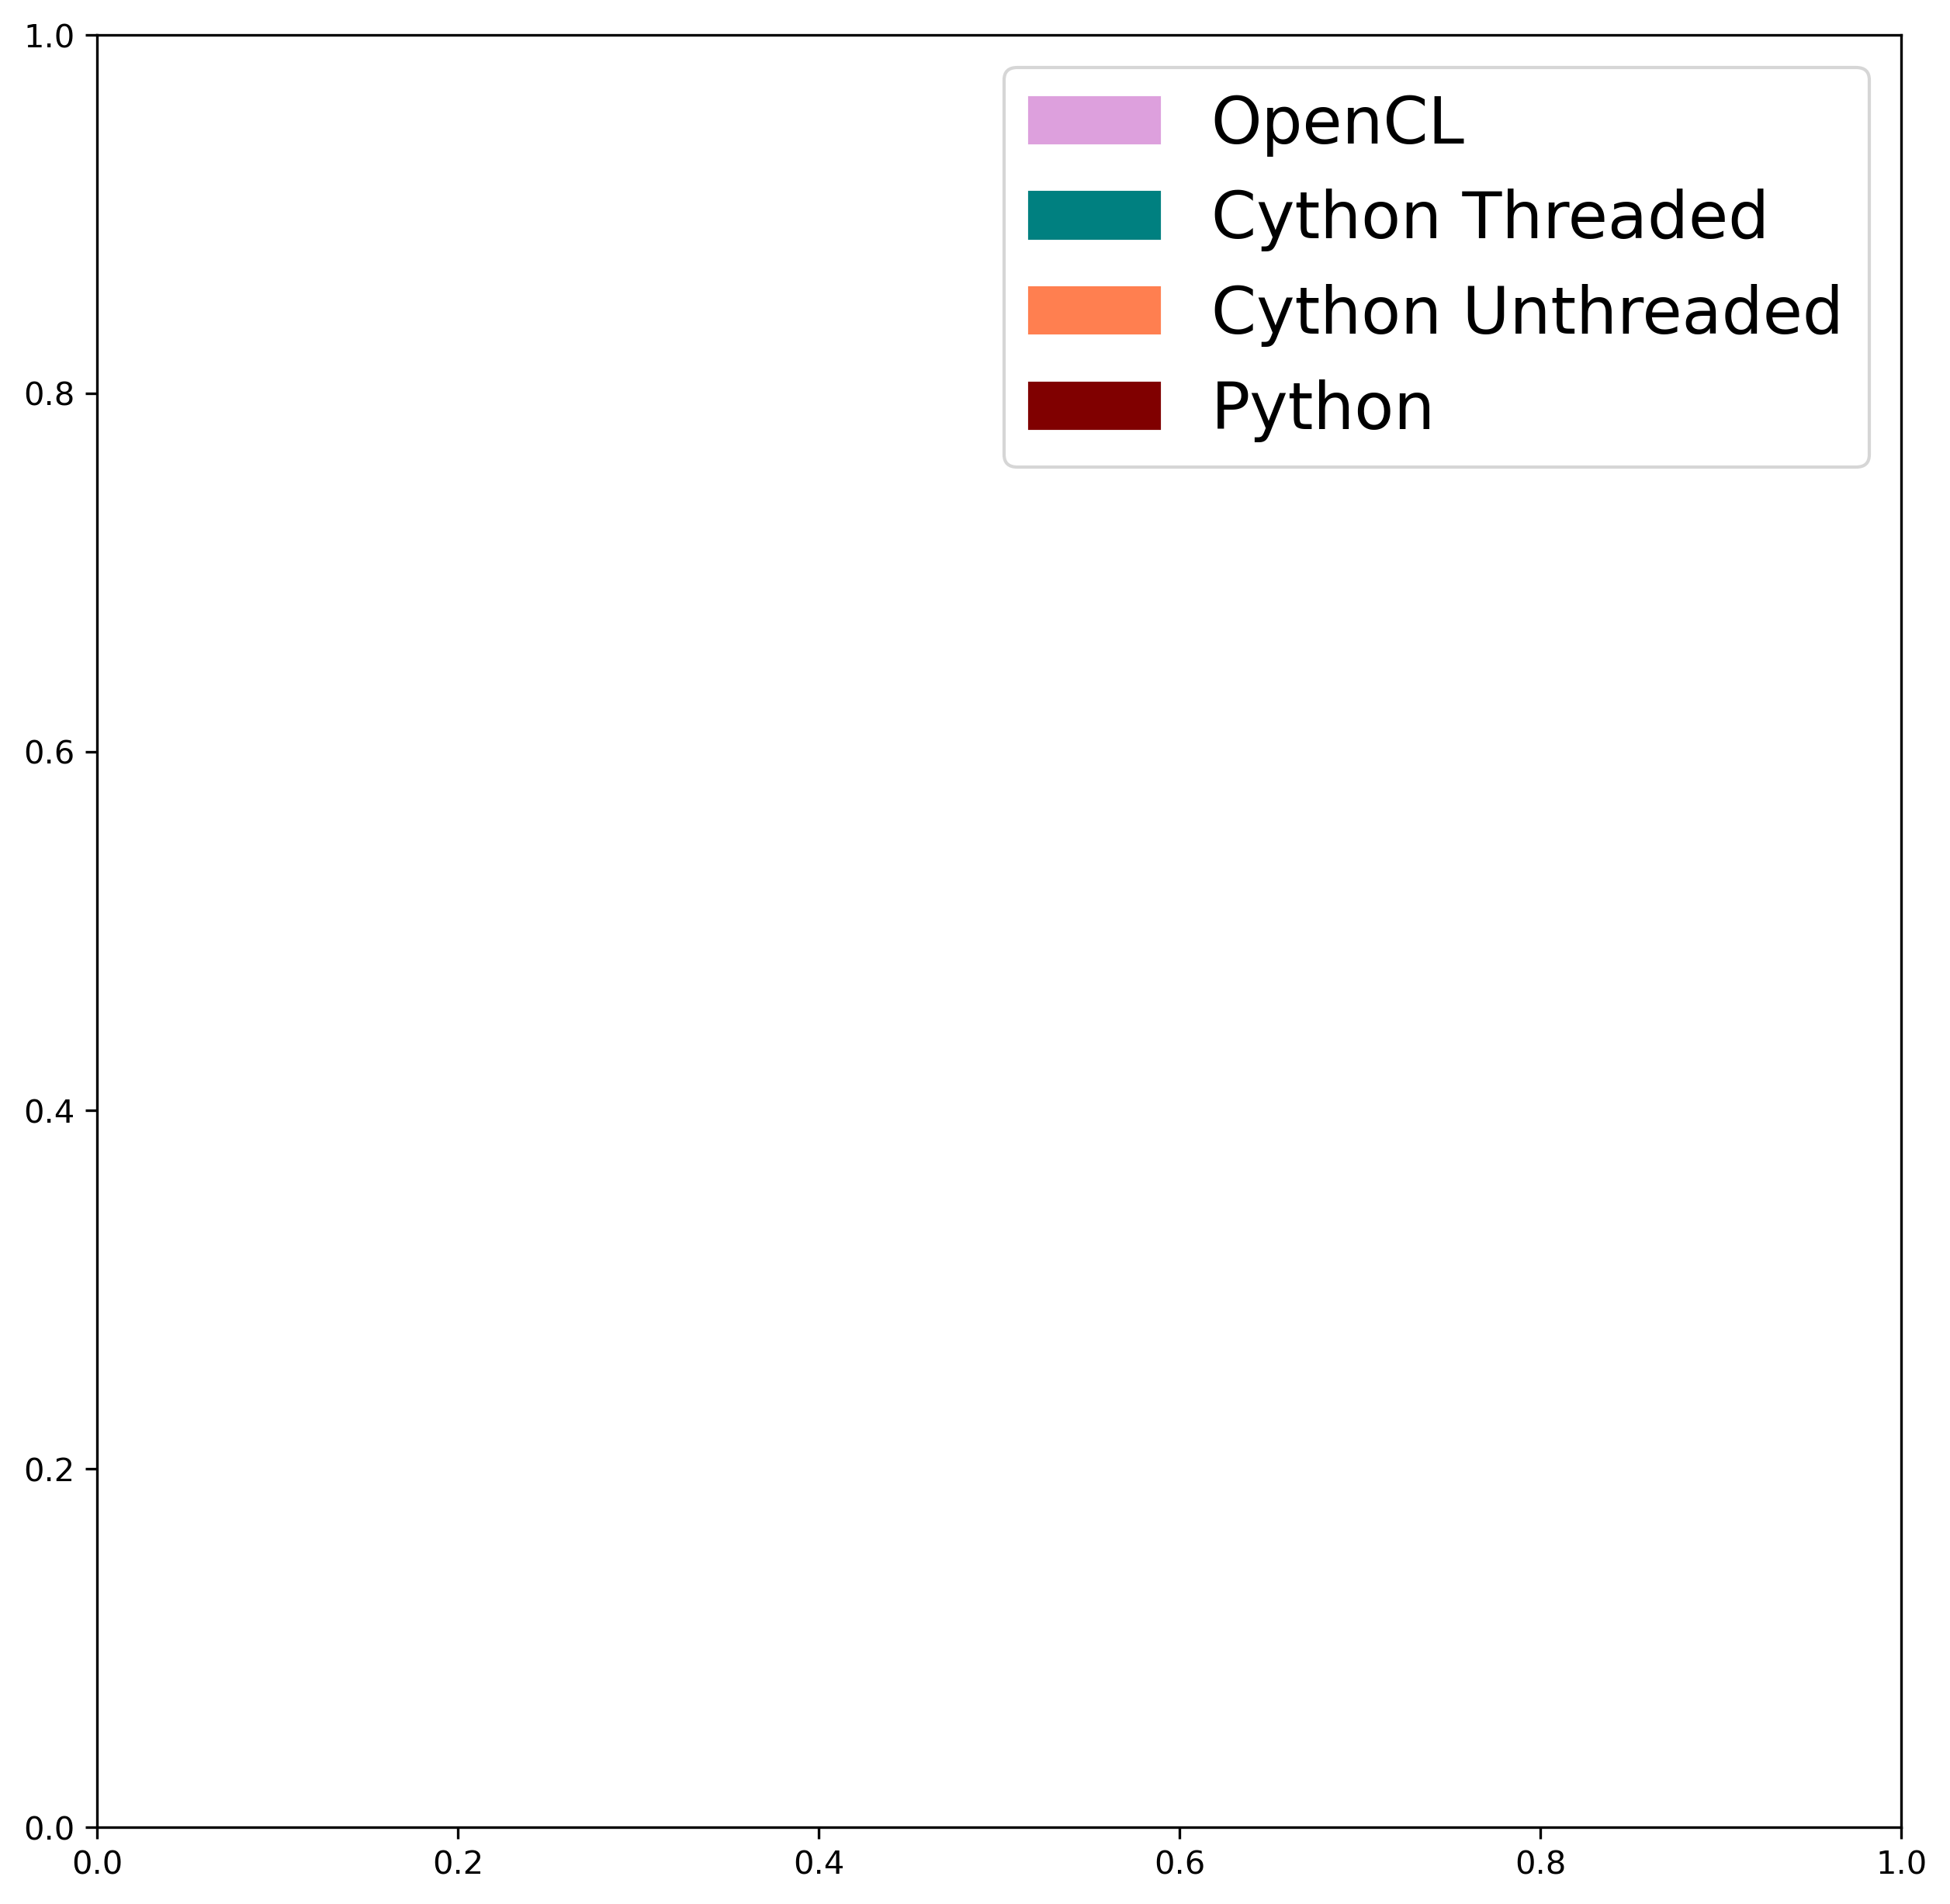

In [16]:
import matplotlib.patches as patches
from matplotlib.legend_handler import HandlerTuple

plt.figure(figsize=(10,10), dpi=300)

colors = ["plum", "teal", "coral","maroon"]

gear_names = ['OpenCL', 'Cython Threaded', 'Cython Unthreaded', 'Python']

patches_cmaps_gradients = []
for idx, color in enumerate(colors):
    cmap_gradient = patches.Patch(facecolor=color, edgecolor=color, label=gear_names[idx])
    patches_cmaps_gradients.append(cmap_gradient)

# Create custom legend (with a large fontsize to better illustrate the result)
plt.legend(handles=patches_cmaps_gradients, labels=gear_names, fontsize=20,
           handler_map={list: HandlerTuple(ndivide=None, pad=0)})

plt.show()